In [2]:
import argparse as ap
import cv2
import numpy as np
import os
from sklearn.externals import joblib
from scipy.cluster.vq import *

from sklearn import preprocessing
import math

In [38]:
des_list, image_paths = joblib.load('pkl/des_list_{}.pkl'.format('rumor'))

In [39]:
len(image_paths)

10664

In [40]:
len(des_list)

10555

In [41]:
for image_path, descriptor in des_list:
    if descriptor is None:
        des_list.remove((image_path, descriptor))

des_sum = 0
for image_path, descriptor in des_list:
    des_sum += descriptor.shape[0]

In [42]:
des_sum

9216844

In [43]:
len(des_list)

10547

In [44]:
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors = np.vstack((descriptors, descriptor))

KeyboardInterrupt: 

In [8]:
descriptors.shape

(497966, 128)

## 测试 cosine 的 np 实现

In [1]:
def cosine_similarity(vec_a, vec_b):
    len_a = 0
    for x in vec_a:
        len_a += x ** 2
    len_a = np.sqrt(len_a)

    len_b = 0
    for x in vec_b:
        len_b += x ** 2
    len_b = np.sqrt(len_b)

    multi = 0
    for i in range(len(vec_a)):
        multi += vec_a[i] * vec_b[i]

    return float(multi / (len_a * len_b))


def cosine_similarity_np(vec_a, vec_b):
    return vec_a.dot(vec_b) / (np.linalg.norm(vec_a) * np.linalg.norm(vec_b))

In [3]:
im_features, image_paths, idf, num_words, voc = joblib.load('pkl/rumor_im_features.pkl')

In [4]:
cosine_similarity(im_features[0], im_features[4199])

0.4384922161790193

In [5]:
cosine_similarity_np(im_features[0], im_features[4199])

/Users/snow/anaconda2/envs/python35/lib/python3.5/site-packages/numpy/linalg/linalg.py:2168: RuntimeWarning: invalid value encountered in sqrt
  ret = sqrt(sqnorm)


nan

In [6]:
im_features[0].dot(im_features[4199])

0.0

In [82]:
im_features[0].shape

(1000,)

In [7]:
from sklearn.metrics import pairwise_distances

In [9]:
cos = pairwise_distances(im_features, metric="cosine")

In [12]:
cos.shape

(10547, 10547)

## 测试阈值

In [130]:
single_pass_cluster = joblib.load('pkl/rumor_spc.pkl')
im_features, image_paths, idf, num_words, voc = joblib.load('pkl/rumor_im_features.pkl')

In [131]:
print(len(image_paths))
len(single_pass_cluster.cluster_list)

10547


3093

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

4 : [0, 2960, 4199, 5526]


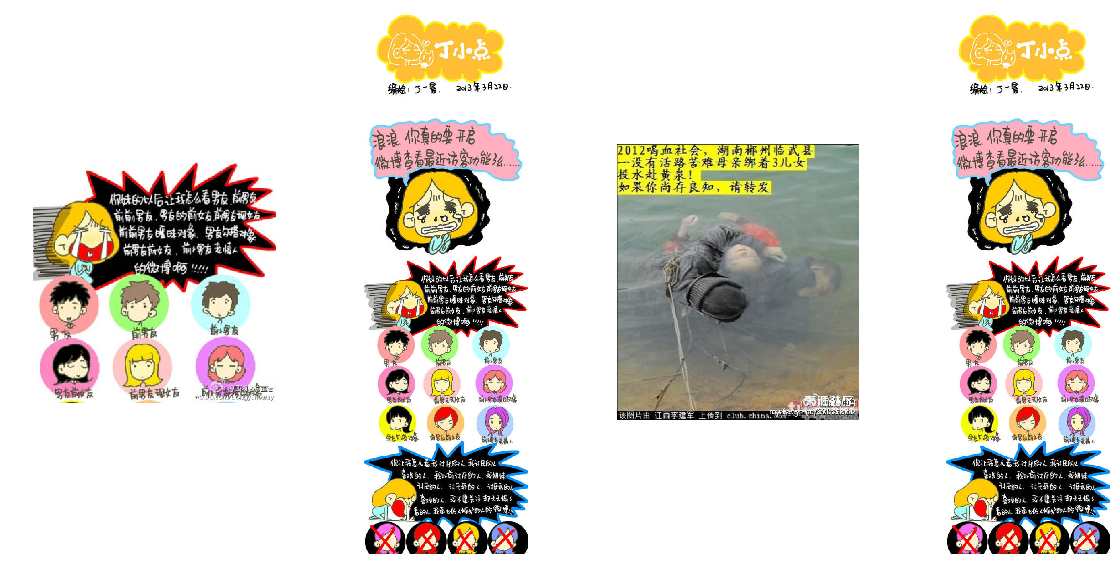

In [53]:
cluster_list = single_pass_cluster.cluster_list
for cluster in cluster_list:
    n_list = cluster.node_list
    print('{} : {}'.format(len(n_list), n_list))
    
    plt.figure(figsize=(20,10))
    for i, n in enumerate(n_list):
        name = image_paths[n]

        plt.subplot(1, 4, i+1)
        plt.imshow(plt.imread(name))
        plt.axis('off')
    
    break

In [134]:
cosine_similarity(im_features[2960], im_features[4199])

0.5499425067225031

377 : [4, 17, 37, 76, 99, 104, 106, 209, 232, 264, 292, 300, 315, 328, 359, 362, 367, 368, 373, 433, 443, 509, 514, 515, 541, 579, 592, 614, 637, 650, 665, 713, 747, 772, 800, 815, 823, 844, 845, 853, 900, 902, 927, 959, 961, 975, 997, 1077, 1092, 1112, 1165, 1176, 1214, 1219, 1266, 1313, 1314, 1333, 1409, 1415, 1416, 1428, 1437, 1496, 1572, 1684, 1687, 1709, 1740, 1752, 1764, 1782, 1795, 1828, 1830, 1881, 1913, 1919, 1932, 1955, 1982, 1987, 2017, 2029, 2042, 2043, 2055, 2108, 2137, 2160, 2168, 2173, 2178, 2192, 2197, 2212, 2286, 2302, 2333, 2336, 2358, 2400, 2412, 2482, 2505, 2520, 2544, 2571, 2584, 2612, 2650, 2669, 2680, 2694, 2720, 2726, 2727, 2734, 2762, 2772, 2802, 2808, 2853, 2876, 2951, 2952, 3006, 3028, 3034, 3123, 3137, 3159, 3189, 3269, 3310, 3314, 3339, 3361, 3363, 3381, 3383, 3441, 3472, 3509, 3529, 3533, 3553, 3640, 3659, 3665, 3684, 3715, 3719, 3736, 3787, 3798, 3802, 3817, 3872, 3894, 3953, 3970, 3976, 3988, 3999, 4043, 4054, 4084, 4100, 4101, 4166, 4232, 4265, 4269, 43

ValueError: num must be 1 <= num <= 9, not 10

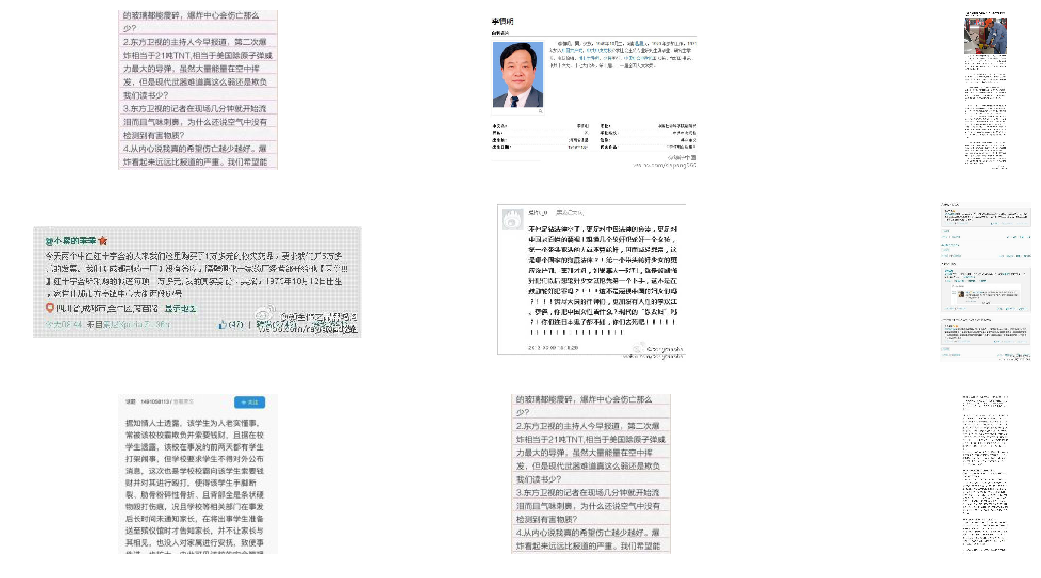

In [139]:
cluster = single_pass_cluster.cluster_list[4]
n_list = cluster.node_list
print('{} : {}'.format(len(n_list), n_list))
    
plt.figure(figsize=(20,10))
for i, n in enumerate(n_list):
    name = image_paths[n]

    plt.subplot(3, 3, i+1)
    plt.imshow(plt.imread(name))
    plt.axis('off')